<a href="https://colab.research.google.com/github/Karanmanolaa/Medical_Premium_Cost_Prediction/blob/main/Medical_cost_premium_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

In [2]:
df = pd.read_csv('Medicalpremium.csv')

In [3]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:

df.shape

(986, 11)

In [5]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [6]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


### Exploratory Data Analysis

#### Visualizing the distribution of age, height, weight and PremiumPrice

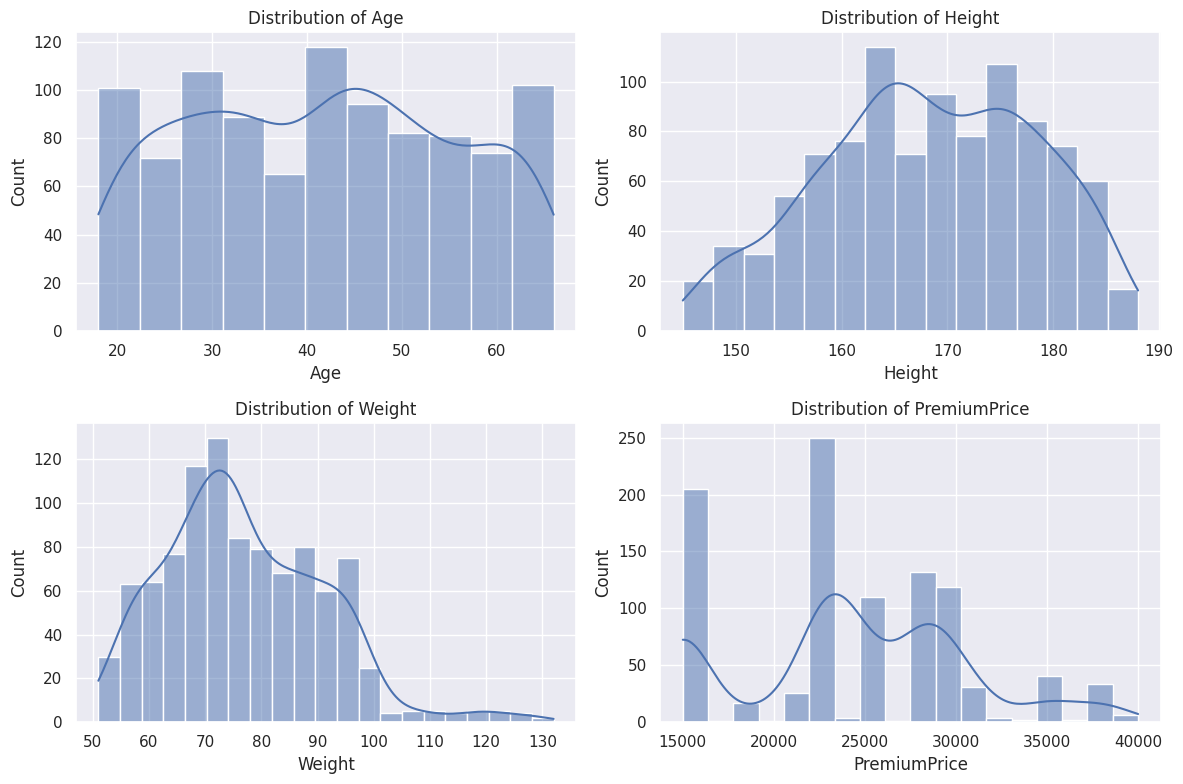

In [7]:
features = ['Age', 'Height', 'Weight', 'PremiumPrice']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

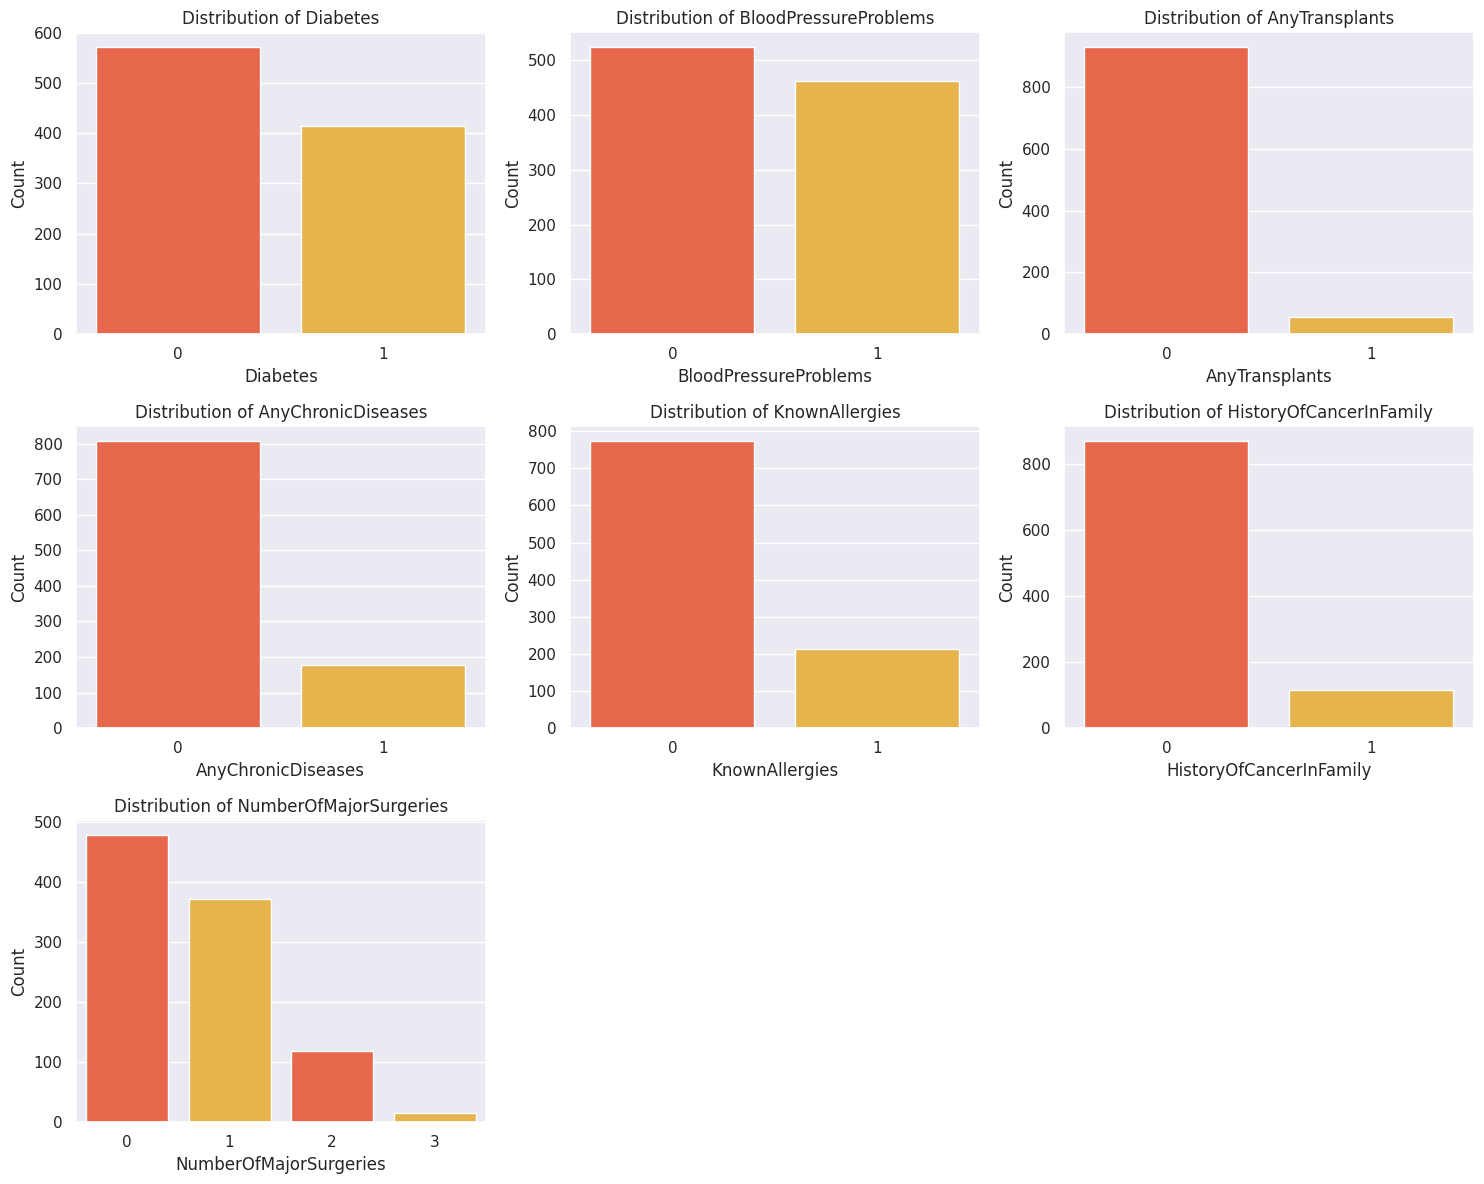

In [8]:
custom_palette = ["#FF5733", "#FFBD33", "#FF5733", "#FFBD33", "#FF5733", "#FFBD33", "#FF5733"]

# Count and visualize the distribution of categorical features
categorical_features = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=feature, palette=custom_palette)  # Apply custom color palette
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### Creating Categorical Labels for Age and Premium Price

In [9]:
lab=['Low','Basic','Average','High','SuperHigh']
df['AgeLabel']=pr_bins=pd.cut(df['Age'],bins=5,labels=lab,precision=0)
df['PremiumLabel']=pr_bins=pd.cut(df['PremiumPrice'],bins=5,labels=lab,precision=0)

#### Number of people opted for insurance based on premium-category on the basis of transplant history

In [10]:
df.groupby(['PremiumLabel','AnyTransplants'])['AnyTransplants'].count()

PremiumLabel  AnyTransplants
Low           0                 213
              1                  11
Basic         0                 382
              1                   1
Average       0                 252
              1                   7
High          0                  76
              1                   2
SuperHigh     0                   8
              1                  34
Name: AnyTransplants, dtype: int64

<Axes: xlabel='PremiumLabel', ylabel='count'>

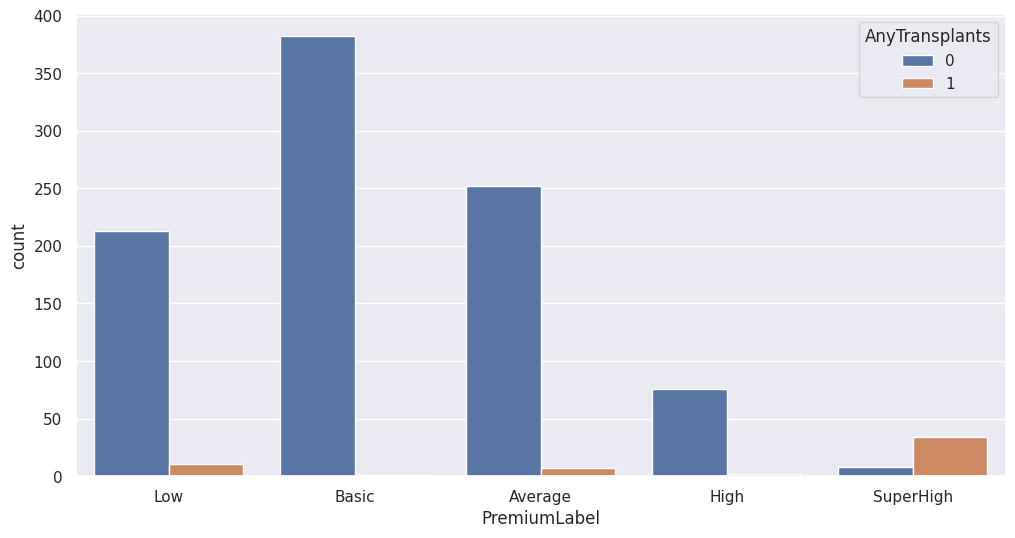

In [11]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel',hue='AnyTransplants', data=df,ax=ax)

#### This suggests that for individuals with lower premium prices, many choose to have insurance, whether or not they have had transplants.Additionally, in the 'SuperHigh' premium category, we see a relatively high number of people with transplants who opted for insurance.However, it's noteworthy that despite the presence of transplants, a greater number of individuals who have not had transplants opted for insurance.

#### Avg. price paid by people in each age category for their health insurance

<Axes: xlabel='AgeLabel'>

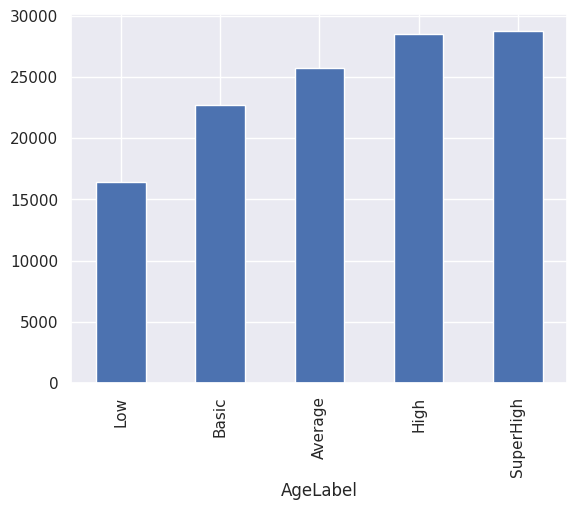

In [12]:
df.groupby(['AgeLabel'])['PremiumPrice'].mean().plot(kind='bar')

#### Number of people opted for insurance based on premium-category after how many surgeries:

In [13]:
df.groupby(['PremiumLabel','NumberOfMajorSurgeries'])['NumberOfMajorSurgeries'].count()

PremiumLabel  NumberOfMajorSurgeries
Low           0                         142
              1                          82
              2                           0
              3                           0
Basic         0                         226
              1                         156
              2                           1
              3                           0
Average       0                          67
              1                          59
              2                         117
              3                          16
High          0                          22
              1                          56
              2                           0
              3                           0
SuperHigh     0                          22
              1                          19
              2                           1
              3                           0
Name: NumberOfMajorSurgeries, dtype: int64

<Axes: xlabel='PremiumLabel', ylabel='count'>

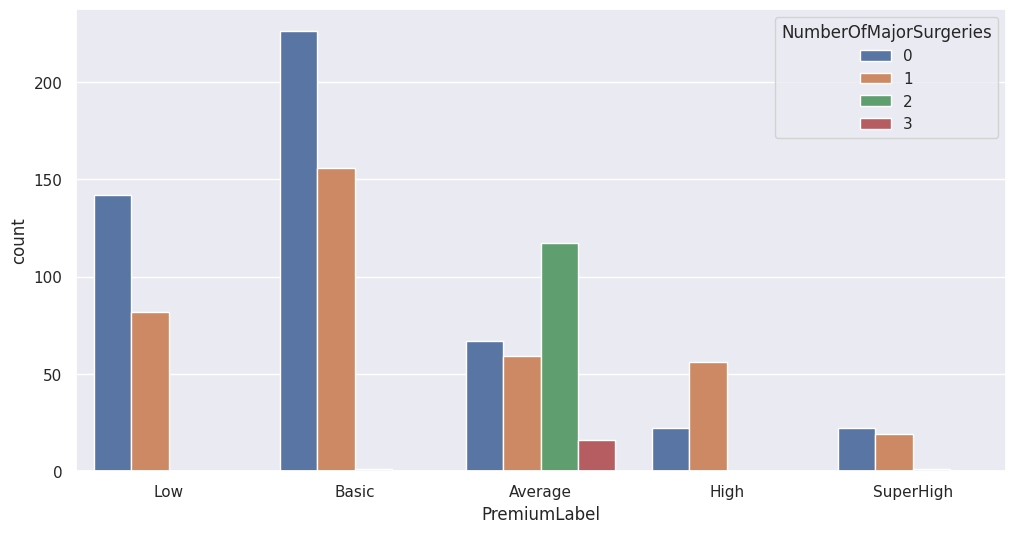

In [14]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel',hue='NumberOfMajorSurgeries', data=df,ax=ax)

We can observe how the premium category and the number of major surgeries influence people's decisions to opt for insurance. For example, in the 'Basic' premium category, we see that a substantial number of people with no major surgeries have opted for insurance. As the number of surgeries increases, the count of people opting for insurance gradually decreases. This suggests that, in the 'Basic' premium category, people with fewer surgeries are more likely to opt for insurance. The data also provides a similar pattern for other premium categories.

In [15]:
df = df.drop(['AgeLabel', 'PremiumLabel'], axis=1)

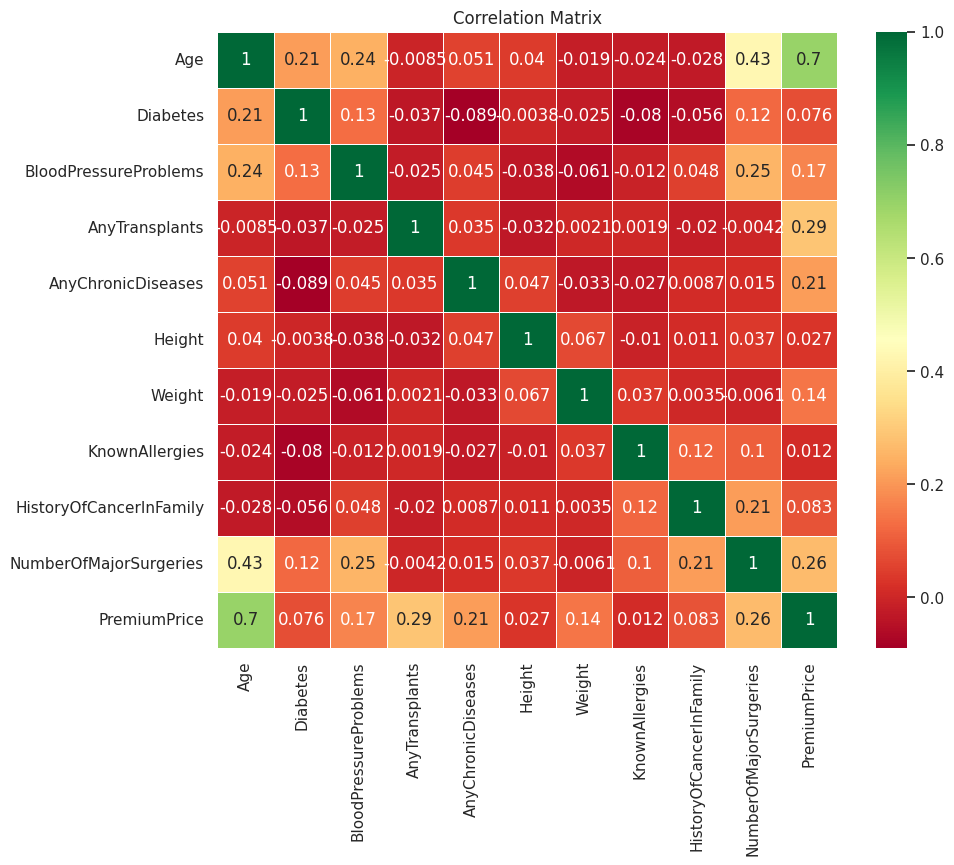

In [16]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

 ## Spliting the data into train and test

In [17]:
x = df.drop(columns=['PremiumPrice'])
y = df['PremiumPrice']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=33,test_size=0.3)

### Model Training

#### Linear Regression

In [19]:
LR = LinearRegression()

In [20]:
LR.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred = LR.predict(x_test)

In [22]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

In [23]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {score:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 12898216.49
R-squared (R2) Score: 0.66
Mean Absolute Error (MAE): 2542.38


### Decision Tree

In [24]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [25]:
DT_pred = dtree.predict(x_test)

In [26]:
DT_mse = mean_squared_error(y_test,DT_pred)
DT_mae = mean_absolute_error(y_test,DT_pred)
DT_score = r2_score(y_test,DT_pred)

print(f'mean_squared_error (mse): {DT_mse:.2f}')
print(f'R-squared (R2) score: {DT_score:.2f}')
print(f'R-mean_absolute_error (mae): {DT_mae:.2f}')

mean_squared_error (mse): 12432432.43
R-squared (R2) score: 0.68
R-mean_absolute_error (mae): 925.68


#### Using Grid Search CV

In [28]:
models = {

    'Ridge': (Ridge(), {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}),

    'Lasso': (Lasso(), {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}),


    'RandomForestRegressor': (RandomForestRegressor(random_state=42), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'GradientBoostingRegressor': (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }),
    'SVR': (SVR(), {
        'C': [0.1, 1.0, 10.0, 100.0],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'epsilon': [0.01, 0.1, 0.2]
    }),
    'KNeighborsRegressor': (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }),
    'XGBRegressor': (XGBRegressor(random_state=42), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 1.0],
        'gamma': [0, 0.1, 0.2]
    })
}

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2) Score: {r2:.4f}")
    print('\n')


Model: Ridge
Best Parameters: {'alpha': 1.0}
Mean Squared Error (MSE): 12885620.4134
Mean Absolute Error (MAE): 2544.9041
R-squared (R2) Score: 0.6650


Model: Lasso
Best Parameters: {'alpha': 10.0}
Mean Squared Error (MSE): 12894764.5573
Mean Absolute Error (MAE): 2545.0829
R-squared (R2) Score: 0.6648


Model: RandomForestRegressor
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Mean Squared Error (MSE): 7073299.0357
Mean Absolute Error (MAE): 1028.2545
R-squared (R2) Score: 0.8161


Model: GradientBoostingRegressor
Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}
Mean Squared Error (MSE): 7136761.6995
Mean Absolute Error (MAE): 1508.3503
R-squared (R2) Score: 0.8145


Model: SVR
Best Parameters: {'C': 100.0, 'epsilon': 0.2, 'kernel': 'linear'}
Mean Squared Error (MSE): 15426101.8682
Mean Absolute Error (MAE): 2613.6851
R-squared (R2) Score: 0.5990


Model: KNeighborsRegressor
Best Parameters: {'n_

In [29]:
import pickle

with open('best_model.pkl', 'wb') as rf_model_file:
    pickle.dump(best_model, rf_model_file)

**THANK YOU**